In [1]:
import pandas as pd

In [2]:
# Importez les trois datasets
superficie = pd.read_csv("superficie.csv")
nb_de_sdb = pd.read_csv("nombre_de_sdb.csv")
nb_de_chambre = pd.read_csv("nombre_de_chambres.csv")

In [3]:
nb_de_chambre.head(3)

,0,1
0,1,4
1,2,1
2,3,4


In [4]:
# Donnez un nom de colonne à ces trois datasets
superficie.columns = ["id", "superficie"]
nb_de_sdb.columns = ["id", "nb_de_sdb"]
nb_de_chambre.columns = ["id", "nb_de_chambre"]

In [6]:
"""
autre solution :
nb_de_chambre.columns.values[0] = "id"
nb_de_chambre.columns.values[1] = "nb_de_chambre"
"""

'\nautre solution :\nnb_de_chambre.columns.values[0] = "id"\nnb_de_chambre.columns.values[1] = "nb_de_chambre"\n'

In [5]:
#Fusionner ces trois datasets un seul dataframe (on fera une fusion simplement par index) qu’on nommera dataset
#étape intermédiare
dataset_temp = pd.merge(superficie, nb_de_sdb, left_on = "id", right_on = "id", how="inner")

In [6]:
#DONE
dataset = pd.merge(dataset_temp, nb_de_chambre, left_on = "id", right_on = "id", how = "inner")

####### Pas mal de le faire en deux fois, tu aurais pu aussi utiliser pd.concat pour ne pas avoir à le faire en deux étapes

In [7]:
dataset.head(5)

,id,superficie,nb_de_sdb,nb_de_chambre
0,1,27667,1,4
1,2,14742,1,1
2,3,28089,3,4
3,4,11713,1,2
4,5,28591,3,4


In [8]:
# Quelle est la superficie moyenne des maisons de notre dataset
round(dataset["superficie"].mean(), 2)

## Très bien pensé le round()

20354.88

In [9]:
# Quelle est le nombre de chambre médian et moyenne
print("moyenne: {}".format(round(dataset["nb_de_chambre"].mean(),2)))
print("médiane: {}".format(dataset["nb_de_chambre"].median()))

moyenne: 2.43
médiane: 2.0


In [10]:
#Nous un nouveau dataset “house_price.csv” que nous voudrions intégrer à notre dataset
#Importez house_price.csv dans une variable qu’on nommera house_price
house_price = pd.read_csv("house_price.csv")

In [11]:
house_price.sort_values(by="id", ascending=True).head(3)

#### Pourquoi cette étape ? 

,Unnamed: 0,id,house_price
32,32,0,1421908.0
71,71,1,1305091.0
65,65,2,164373.0


In [12]:
# iii) Fusionnez house_price à dataset
dataset = pd.merge(dataset, house_price, left_on = "id", right_on = "id", how = "inner")

### Super !

In [2]:
dataset.head(5)

#### Ici, tu aurais pu aussi enlever la colonne 'Unnamed: 0' pour éviter de surcharger ton dataset 

NameError: name 'dataset' is not defined

In [ ]:
#Quel est le coût moyen d’une maison ?
round(dataset["house_price"].mean(), 2)

In [15]:
# Quel est le coût moyen par chambre
dataset.loc[:,["nb_de_chambre", "house_price"]].groupby(["nb_de_chambre"]).mean()


#### YES, Bravo pour avoir trouvé le groupby, très bonne utilisation

,house_price
nb_de_chambre,
1,960723.363636
2,642086.258065
3,645904.592593
4,888045.631579


In [16]:
#Tentons de faire des catégories de superficie
# i) Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison
dataset["taille_maison"] = None

In [17]:
dataset.head(3)

,id,superficie,nb_de_sdb,nb_de_chambre,Unnamed: 0,house_price,taille_maison
0,1,27667,1,4,71,1305091.0,None
1,2,14742,1,1,65,164373.0,None
2,3,28089,3,4,88,1441714.0,None


In [18]:
# Créez des catégories “très grande” / “grande” / “moyenne” / “petite” / “très petite”
dataset2 = dataset[dataset["superficie"] > 25000].fillna(value = "Très grande")
dataset2 = dataset2.append(dataset.query("superficie > 20000 and superficie <= 25000").fillna(value = "Grande"))
dataset2 = dataset2.append(dataset.query("superficie > 15000 and superficie <= 20000").fillna(value = "Moyenne"))
dataset2 = dataset2.append(dataset.query("superficie > 10000 and superficie <= 15000").fillna(value = "Petite"))
dataset2 = dataset2.append(dataset.query("superficie <= 10000").fillna(value = "Très petite"))

### Pas mal pensé aussi ! Un autre moyen est d'utiliser une boucle si tu veux. 

In [20]:
dataset2.sort_values(by="id", ascending=True).head(10)

,id,superficie,nb_de_sdb,nb_de_chambre,Unnamed: 0,house_price,taille_maison
0,1,27667,1,4,71,1305091.0,Très grande
1,2,14742,1,1,65,164373.0,Petite
2,3,28089,3,4,88,1441714.0,Très grande
3,4,11713,1,2,49,108290.0,Petite
4,5,28591,3,4,33,1703033.0,Très grande
5,6,17385,3,3,54,340284.0,Moyenne
6,7,26197,2,3,42,1236645.0,Très grande
7,8,17611,2,3,20,257405.0,Moyenne
8,9,12841,3,3,99,157433.0,Petite
9,10,25063,2,3,78,1697584.0,Très grande


In [23]:
# 11) Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?
round(dataset2.loc[:,["taille_maison", "house_price"]].groupby(["taille_maison"]).mean(),2)

,house_price
taille_maison,
Grande,732538.52
Moyenne,325694.79
Petite,156138.69
Très grande,1556667.29


C:\Users\Mathieu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


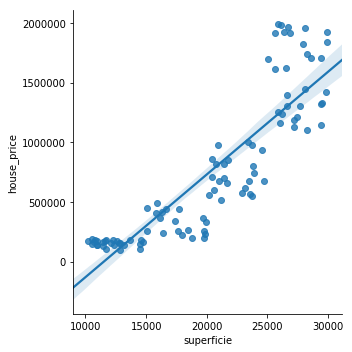

In [27]:
# 12) Appliquez le code ci-dessous pour visualiser votre résultat. Que pouvez vous conclure ?
import seaborn as sns
sns.lmplot(x = "superficie", y="house_price", data = dataset2)

# =>> Plus la maison est grande, plus son prix augmente